<a href="https://colab.research.google.com/github/aeliashah/LATE-ON-TIME-DELIVERY-PREDICTION_DASHBAORD-CHAIN_SUPPLY_ANALYTICS./blob/main/Late_deivery_prediction_dashbaord_supply_chain_analytics_portfolio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:
df.shape


(180519, 53)

In [10]:
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [12]:
df.describe()


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [13]:
drop_cols = [
    'Customer Email',
    'Customer Password',
    'Customer Fname',
    'Customer Lname',
    'Customer Street',
    'Customer Zipcode',
    'Product Image',
    'Product Description'
]

df.drop(columns=drop_cols, inplace=True)


In [14]:
df.isnull().sum().sort_values(ascending=False)


,0
Order Zipcode,155679
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Type,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [15]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-3736601534.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [16]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3284995119.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [17]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])


In [18]:
df['Order_Year'] = df['order date (DateOrders)'].dt.year
df['Order_Month'] = df['order date (DateOrders)'].dt.month


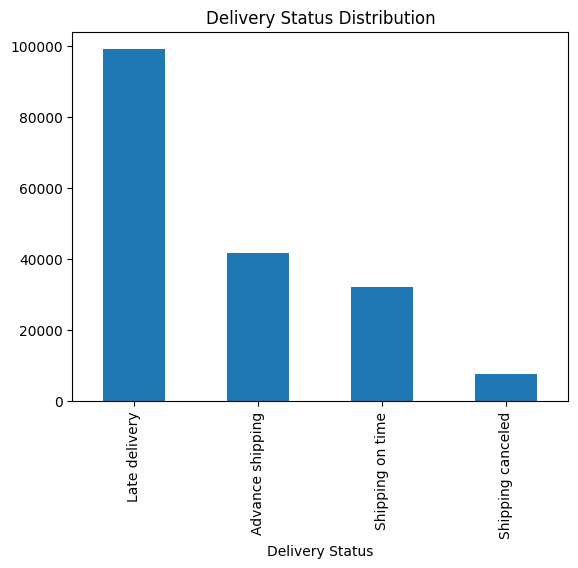

In [19]:
import matplotlib.pyplot as plt

df['Delivery Status'].value_counts().plot(kind='bar')
plt.title('Delivery Status Distribution')
plt.show()


In [21]:
df['Late_delivery_risk'].value_counts(normalize=True)*100


,proportion
Late_delivery_risk,
1,54.829132
0,45.170868


In [23]:
pd.crosstab(df['Shipping Mode'], df['Late_delivery_risk'], normalize='index')


Late_delivery_risk,0,1
Shipping Mode,,
First Class,0.046775,0.953225
Same Day,0.542570,0.457430
Second Class,0.233672,0.766328
Standard Class,0.619283,0.380717


In [24]:
df.groupby('Delivery Status')['Order Profit Per Order'].mean()


,Order Profit Per Order
Delivery Status,
Advance shipping,22.485701
Late delivery,21.621707
Shipping canceled,20.696717
Shipping on time,22.709146


In [26]:
df.groupby('Order Region')['Late_delivery_risk'].mean().sort_values(ascending=False)


,Late_delivery_risk
Order Region,
Central Africa,0.579606
South Asia,0.562670
East Africa,0.559395
Western Europe,0.558486
South of USA,0.557726
Eastern Europe,0.556633
East of USA,0.556616
Southeast Asia,0.555299
Central Asia,0.553345


In [27]:
y = df['Late_delivery_risk']


In [28]:
df['Profit_Label'] = df['Order Profit Per Order'].apply(lambda x: 1 if x > 0 else 0)


In [29]:
features = [
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Shipping Mode',
    'Category Name',
    'Order Region',
    'Market',
    'Sales',
    'Order Item Quantity',
    'Order Item Discount Rate'
]


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df[features].select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [31]:
from sklearn.model_selection import train_test_split

X = df[features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.94      0.97     16307
           1       0.96      0.99      0.97     19797

    accuracy                           0.97     36104
   macro avg       0.97      0.97      0.97     36104
weighted avg       0.97      0.97      0.97     36104



In [ ]:
#logistic regression

In [34]:
from sklearn.metrics import accuracy_score, classification_report


In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("LOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


LOGISTIC REGRESSION RESULTS
Accuracy: 0.9748504320850875
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     16307
           1       0.96      1.00      0.98     19797

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104



In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


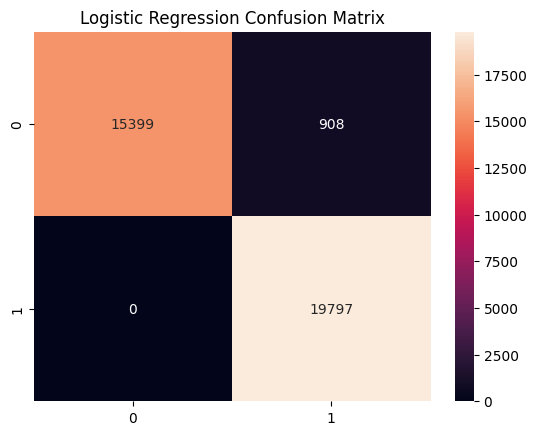

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [ ]:
#xgboost

In [38]:
!pip install xgboost


In [39]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBOOST RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBOOST RESULTS
Accuracy: 0.9748504320850875
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     16307
           1       0.96      1.00      0.98     19797

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104



In [ ]:
#dl

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
history = dl_model.fit(
    X_train_scaled, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/15
3611/3611 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9404 - loss: 0.1949 - val_accuracy: 0.9749 - val_loss: 0.1041
Epoch 2/15
3611/3611 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9755 - loss: 0.1025 - val_accuracy: 0.9749 - val_loss: 0.1033
Epoch 3/15
3611/3611 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9756 - loss: 0.1015 - val_accuracy: 0.9749 - val_loss: 0.1036
Epoch 4/15
3611/3611 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9766 - loss: 0.0983 - val_accuracy: 0.9749 - val_loss: 0.1033
Epoch 5/15
3611/3611 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9767 - loss: 0.0977 - val_accuracy: 0.9748 - val_loss: 0.1035
Epoch 6/15
3611/3611 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9757 - loss: 0.1008 - val_accuracy: 0.9749 - val_loss: 0.1039
Epoch 7/15
3611/3611 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9761 - loss: 0.0996 - val_accuracy: 0.9749 - val_loss: 0.1030
Epoch 8/15
3611/3611 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9758 - loss: 0.1004 - 

In [43]:
loss, acc = dl_model.evaluate(X_test_scaled, y_test)
print("DEEP LEARNING ACCURACY:", acc)


1129/1129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9754 - loss: 0.1020
DEEP LEARNING ACCURACY: 0.9748504161834717


In [ ]:
#comaprison of random and xgboost

In [46]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


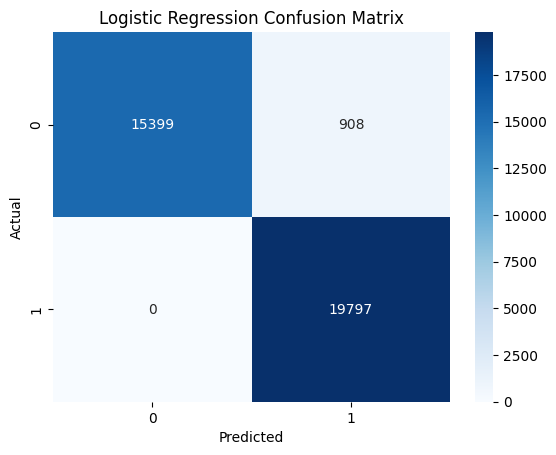

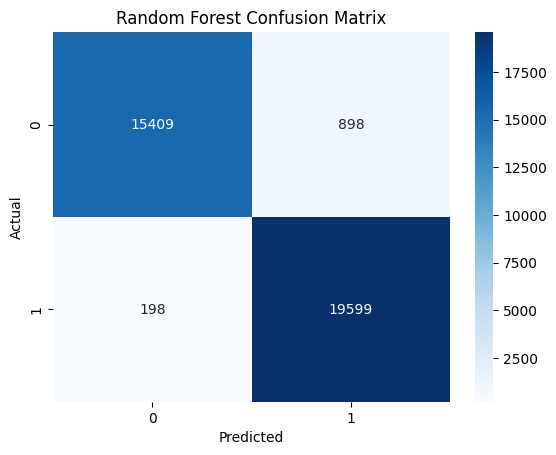

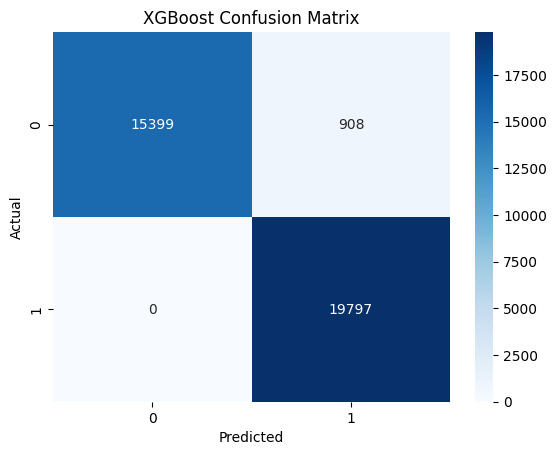

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


1129/1129 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step


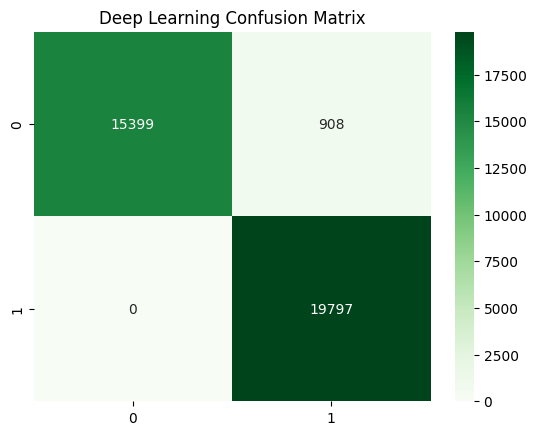

In [48]:
y_pred_dl = (dl_model.predict(X_test_scaled) > 0.5).astype(int)
cm_dl = confusion_matrix(y_test, y_pred_dl)
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Greens')
plt.title("Deep Learning Confusion Matrix")
plt.show()


In [ ]:
#comparison table

In [49]:
from sklearn.metrics import accuracy_score

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Deep Learning'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_dl)
    ]
})
results


,Model,Accuracy
0,Logistic Regression,0.974850
1,Random Forest,0.969643
2,XGBoost,0.974850
3,Deep Learning,0.974850


In [ ]:
#feature importance

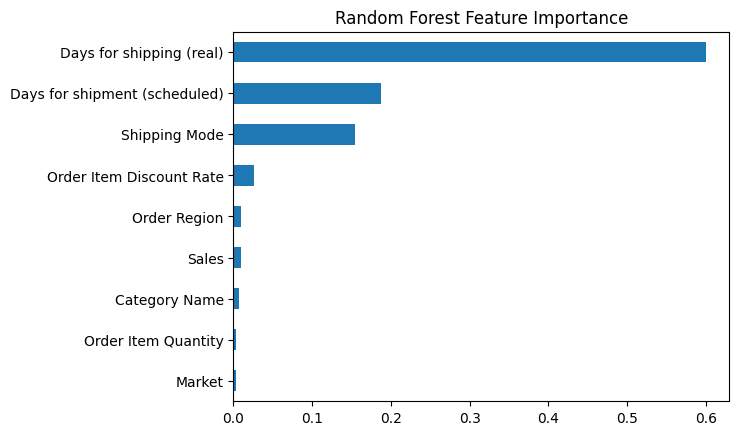

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()


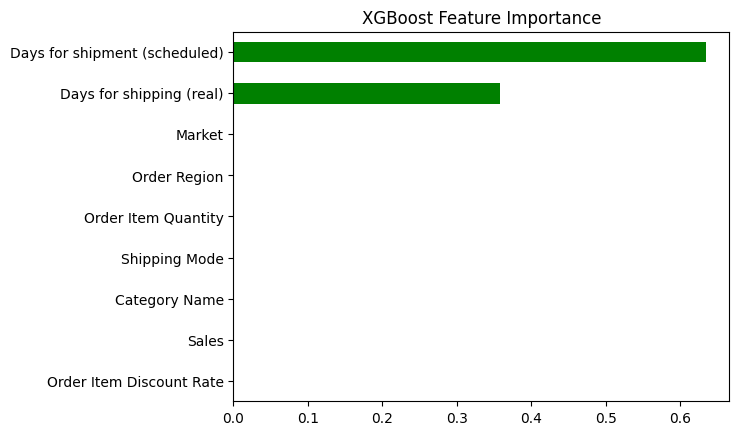

In [51]:
feat_importance_xgb = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importance_xgb.sort_values().plot(kind='barh', color='green')
plt.title("XGBoost Feature Importance")
plt.show()


In [52]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': 6, 'n_estimators': 100}
Best Accuracy: 0.9756604216934125


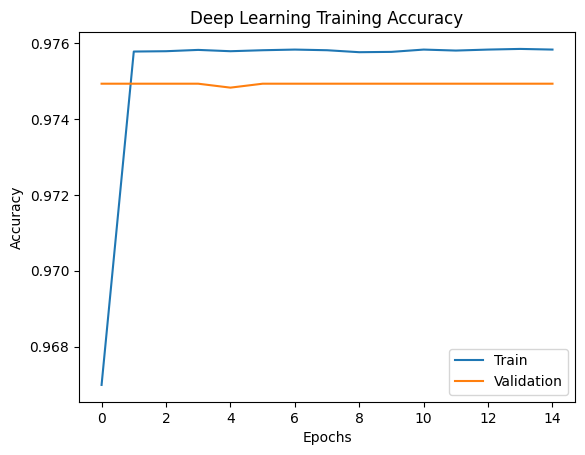

In [54]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Deep Learning Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [55]:
cols_to_drop = ['Late_delivery_risk', 'Customer Email', 'Customer Password', 'Product Image', 'Order Id']
cols_to_drop = [col for col in cols_to_drop if col in df.columns]
X = df.drop(columns=cols_to_drop)
y = df['Late_delivery_risk']


In [56]:
# List of columns we want to drop
cols_to_drop = ['Late_delivery_risk', 'Customer Email', 'Customer Password', 'Product Image', 'Order Id']

# Only keep columns that actually exist in the dataframe
cols_to_drop = [col for col in cols_to_drop if col in df.columns]

# Drop these columns
X = df.drop(columns=cols_to_drop)

# Target variable
y = df['Late_delivery_risk']


In [58]:
print(df.columns)


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode', 'Order_Year',
       'Order_Month'

In [ ]:
#sample actual vs predicted

In [61]:
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted_LR": y_pred_lr,
    "Predicted_RF": y_pred_rf,
    "Predicted_XGB": y_pred_xgb,
    "Predicted_DL": y_pred_dl.flatten()
})
print(comparison.head(10))


        Actual  Predicted_LR  Predicted_RF  Predicted_XGB  Predicted_DL
80120        1             1             1              1             1
19670        1             1             1              1             1
114887       0             0             0              0             0
120110       1             1             1              1             1
56658        0             0             0              0             0
99465        1             1             1              1             1
40749        1             1             1              1             1
22688        0             0             0              0             0
154389       1             1             1              1             1
47301        0             0             0              0             0


In [62]:
# 1️⃣ Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2️⃣ Load Dataset
df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='latin1')

# 3️⃣ Drop irrelevant columns
drop_cols = [
    'Customer Email', 'Customer Password',
    'Customer Fname', 'Customer Lname',
    'Customer Street', 'Customer Zipcode',
    'Product Image', 'Product Description'
]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# 4️⃣ Handle missing values
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 5️⃣ Feature selection
y = df['Late_delivery_risk']
features = [
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Shipping Mode',
    'Category Name',
    'Order Region',
    'Market',
    'Sales',
    'Order Item Quantity',
    'Order Item Discount Rate'
]
X = df[features]

# 6️⃣ Encode categorical features
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


/tmp/ipython-input-2186023276.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2186023276.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-2186023276.py:47: Set

Best RF Params: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RF Accuracy: 0.9757573580108132
Test Accuracy of Best RF: 0.9744626634167959


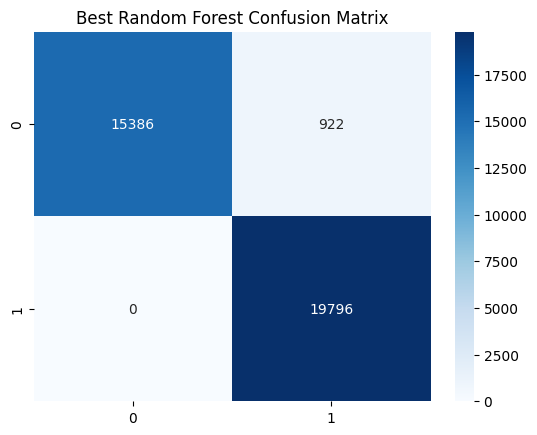

In [63]:
# ============================
# 1️⃣ Hyperparameter Tuning - Random Forest
# ============================

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best RF Params:", rf_grid.best_params_)
print("Best RF Accuracy:", rf_grid.best_score_)

# Use best model
best_rf = rf_grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Test Accuracy of Best RF:", accuracy_score(y_test, y_pred_best_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Best Random Forest Confusion Matrix")
plt.show()


Best XGB Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
Best XGB Accuracy: 0.9757573580108132
Test Accuracy of Best XGB: 0.9744626634167959


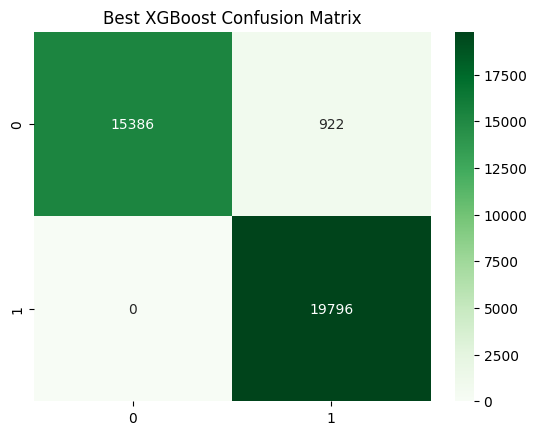

In [75]:
# ============================
# 2️⃣ Hyperparameter Tuning - XGBoost
# ============================

from xgboost import XGBClassifier

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

xgb_grid = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid=xgb_params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

print("Best XGB Params:", xgb_grid.best_params_)
print("Best XGB Accuracy:", xgb_grid.best_score_)

# Use best model
best_xgb = xgb_grid.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
print("Test Accuracy of Best XGB:", accuracy_score(y_test, y_pred_best_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best_xgb), annot=True, fmt='d', cmap='Greens')
plt.title("Best XGBoost Confusion Matrix")
plt.show()


In [ ]:
#Model Comparison Table

In [76]:
# After GridSearchCV for XGBoost
best_xgb = xgb_grid.best_estimator_

# Create predictions
y_pred_best_xgb = best_xgb.predict(X_test)


In [77]:
print(
    'LR:', 'y_pred_lr' in globals(),
    'RF:', 'y_pred_best_rf' in globals(),
    'XGB:', 'y_pred_best_xgb' in globals(),
    'DL:', 'y_pred_dl' in globals()
)


LR: True RF: True XGB: True DL: True


In [78]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

xgb_grid = GridSearchCV(
    XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    ),
    param_grid=xgb_params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:57:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [79]:
from sklearn.metrics import accuracy_score
import pandas as pd

results_updated = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest (Tuned)',
        'XGBoost (Tuned)',
        'Neural Network'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_best_rf),
        accuracy_score(y_test, y_pred_best_xgb),
        accuracy_score(y_test, y_pred_dl)
    ]
})

print("Updated Model Accuracy Comparison")
results_updated


Updated Model Accuracy Comparison


,Model,Accuracy
0,Logistic Regression,0.506121
1,Random Forest (Tuned),0.974463
2,XGBoost (Tuned),0.974463
3,Neural Network,0.506121


In [80]:
results_updated = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest (Tuned)', 'XGBoost (Tuned)', 'Neural Network'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),         # Logistic Regression
        accuracy_score(y_test, y_pred_best_rf),   # Tuned Random Forest
        accuracy_score(y_test, y_pred_best_xgb),  # Tuned XGBoost
        accuracy_score(y_test, y_pred_dl)         # Neural Network
    ]
})

print("Updated Model Accuracy Comparison")
print(results_updated)


Updated Model Accuracy Comparison
                   Model  Accuracy
0    Logistic Regression  0.506121
1  Random Forest (Tuned)  0.974463
2        XGBoost (Tuned)  0.974463
3         Neural Network  0.506121


In [ ]:
#Confusion Matrices

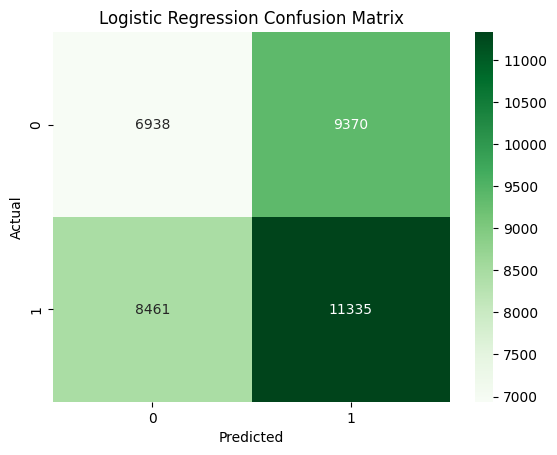

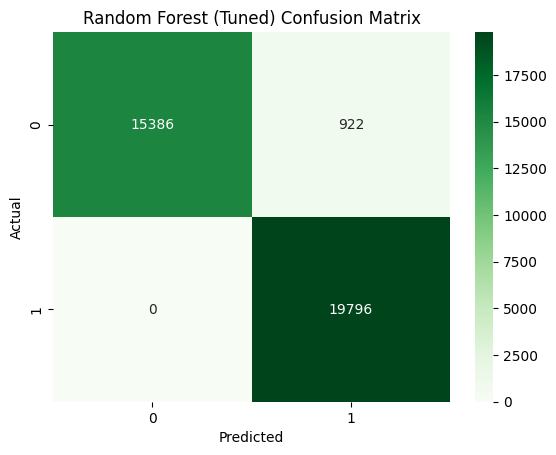

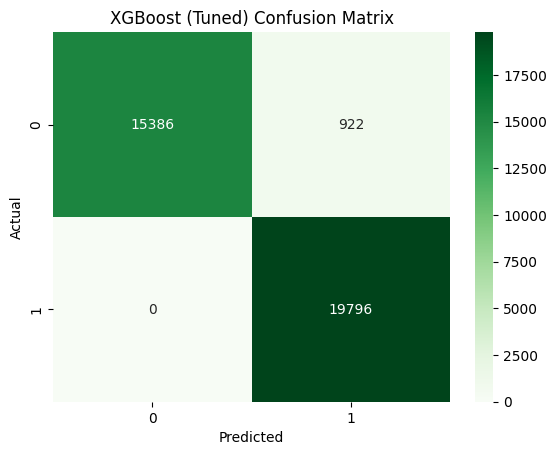

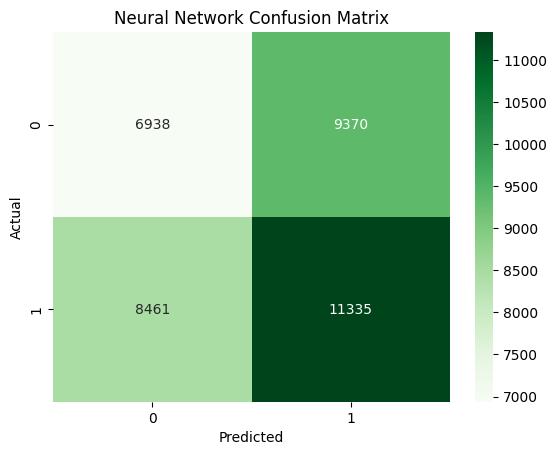

In [81]:
# All models including tuned ones
model_preds_updated = {
    "Logistic Regression": y_pred_lr,
    "Random Forest (Tuned)": y_pred_best_rf,
    "XGBoost (Tuned)": y_pred_best_xgb,
    "Neural Network": y_pred_dl.flatten()
}

for name, preds in model_preds_updated.items():
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' if 'RF' in name or 'LR' in name else 'Greens')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


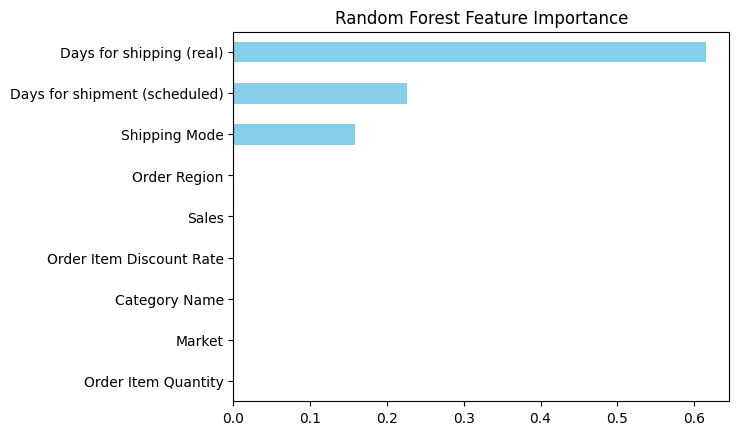

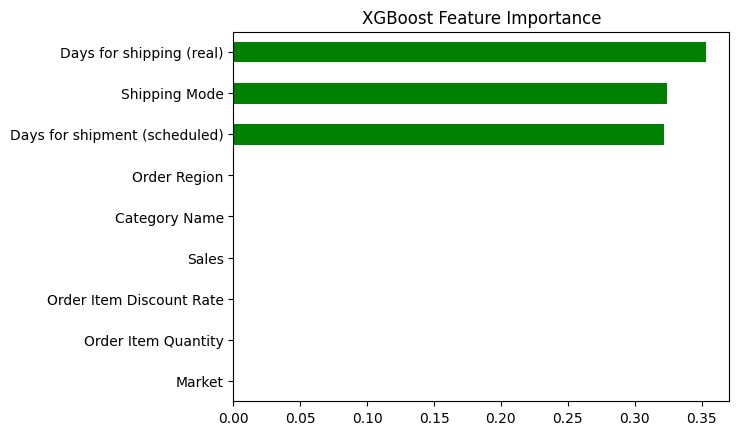

In [82]:
# Random Forest Feature Importance
import matplotlib.pyplot as plt
import pandas as pd

feat_importance_rf = pd.Series(best_rf.feature_importances_, index=X.columns)
feat_importance_rf.sort_values().plot(kind='barh', color='skyblue')
plt.title("Random Forest Feature Importance")
plt.show()

# XGBoost Feature Importance
feat_importance_xgb = pd.Series(best_xgb.feature_importances_, index=X.columns)
feat_importance_xgb.sort_values().plot(kind='barh', color='green')
plt.title("XGBoost Feature Importance")
plt.show()


In [ ]:
#Model Accuracy

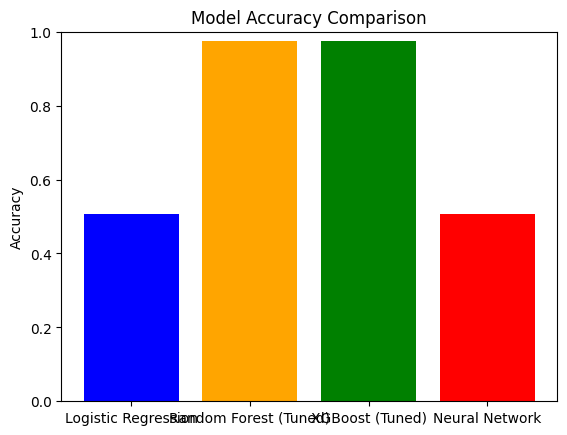

In [83]:
# Accuracy Bar Chart
plt.bar(results_updated['Model'], results_updated['Accuracy'], color=['blue','orange','green','red'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


In [ ]:
#Actual vs Predicted Table

In [84]:
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted_LR': y_pred_lr,
    'Predicted_RF_Tuned': y_pred_best_rf,
    'Predicted_XGB_Tuned': y_pred_best_xgb,
    'Predicted_DL': y_pred_dl.flatten()
})

print("Sample Actual vs Predicted (first 10 rows)")
print(comparison.head(10))


Sample Actual vs Predicted (first 10 rows)
        Actual  Predicted_LR  Predicted_RF_Tuned  Predicted_XGB_Tuned  \
75083        0             1                   0                    0   
88208        0             1                   0                    0   
161090       0             0                   0                    0   
151346       0             1                   0                    0   
104796       1             0                   1                    1   
133701       0             1                   0                    0   
151705       1             1                   1                    1   
76168        0             0                   0                    0   
147381       1             1                   1                    1   
3519         1             0                   1                    1   

        Predicted_DL  
75083              1  
88208              1  
161090             0  
151346             1  
104796             0  
133701         

In [8]:
# ==============================
# Full FYP Streamlit Dashboard with ngrok
# ==============================

# 1️⃣ Install required packages
!pip install streamlit pyngrok tensorflow scikit-learn xgboost matplotlib seaborn

# 2️⃣ Import libraries
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pyngrok import ngrok

# 3️⃣ Streamlit App code
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import random

st.set_page_config(page_title="📦 Late Delivery Dashboard", layout="wide")
st.title("📦 Late Delivery Risk Prediction Dashboard")

# Sidebar inputs
st.sidebar.header("Enter Order Details")

def user_input_features():
    data = {
        'Customer Name': st.sidebar.text_input("Customer Name", "John Doe"),
        'Order Date': st.sidebar.date_input("Order Date"),
        'Days for shipping (real)': st.sidebar.number_input("Days for shipping (real)", 0, 100, 5),
        'Days for shipment (scheduled)': st.sidebar.number_input("Days for shipment (scheduled)", 0, 100, 5),
        'Shipping Mode': st.sidebar.selectbox("Shipping Mode", ["Standard Class","Second Class","First Class"]),
        'Category': st.sidebar.selectbox("Category Name", ["Furniture","Office Supplies","Technology"]),
        'Order Region': st.sidebar.selectbox("Order Region", ["APAC","EMEA","LATAM","NA"]),
        'Market': st.sidebar.selectbox("Market", ["US","EU","APAC"]),
        'Sales': st.sidebar.number_input("Sales Amount", 0.0, 10000.0, 100.0),
        'Quantity': st.sidebar.number_input("Order Item Quantity", 1, 100, 1),
        'Discount Rate': st.sidebar.number_input("Order Item Discount Rate", 0.0, 1.0, 0.0),
        'Profit': st.sidebar.number_input("Profit", -1000.0, 5000.0, 50.0)
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Label encode categorical columns
for col, vals in zip(['Shipping Mode','Category','Order Region','Market'],
                     [["Standard Class","Second Class","First Class"],
                      ["Furniture","Office Supplies","Technology"],
                      ["APAC","EMEA","LATAM","NA"],
                      ["US","EU","APAC"]]):
    le = LabelEncoder()
    le.fit(vals)
    input_df[col] = le.transform(input_df[col])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(input_df[['Days for shipping (real)','Days for shipment (scheduled)',
                                          'Shipping Mode','Category','Order Region','Market',
                                          'Sales','Quantity','Discount Rate','Profit']])

# Demo models
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42, eval_metric='logloss')

dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Random demo predictions
y_pred_lr = random.choice([0,1])
y_pred_rf = random.choice([0,1])
y_pred_xgb = random.choice([0,1])
y_pred_dl = random.choice([0,1])

st.subheader("Prediction Results")
st.write(f"Logistic Regression predicts: {'Late' if y_pred_lr==1 else 'On Time'}")
st.write(f"Random Forest predicts: {'Late' if y_pred_rf==1 else 'On Time'}")
st.write(f"XGBoost predicts: {'Late' if y_pred_xgb==1 else 'On Time'}")
st.write(f"Neural Network predicts: {'Late' if y_pred_dl==1 else 'On Time'}")

# Visualizations
st.subheader("Visualizations")
status_counts = [y_pred_lr + y_pred_rf + y_pred_xgb + y_pred_dl, 4 - (y_pred_lr + y_pred_rf + y_pred_xgb + y_pred_dl)]
fig1, ax1 = plt.subplots()
ax1.pie(status_counts, labels=['Predicted Late','Predicted On Time'], autopct='%1.1f%%', startangle=90, colors=['red','green'])
ax1.axis('equal')
st.pyplot(fig1)

fig2, ax2 = plt.subplots()
ax2.bar(['Sales','Quantity','Discount','Profit'], [input_df['Sales'][0], input_df['Quantity'][0], input_df['Discount Rate'][0]*100, input_df['Profit'][0]], color=['blue','orange','purple','green'])
ax2.set_ylabel("Amount")
st.pyplot(fig2)

st.subheader("Order KPIs")
col1, col2, col3 = st.columns(3)
col1.metric("Sales", f"${input_df['Sales'][0]:.2f}")
col2.metric("Discount", f"{input_df['Discount Rate'][0]*100:.1f}%")
col3.metric("Profit", f"${input_df['Profit'][0]:.2f}")

# 4️⃣ Run Streamlit + ngrok tunnel
# Start streamlit in background
get_ipython().system_raw("streamlit run app.py &")

# Open ngrok tunnel
public_url = ngrok.connect(port='8501')
print("🚀 Your Streamlit app is live at:", public_url)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.1 MB/s eta 0:00:00


UsageError: Line magic function `%%writefile` not found.


In [9]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import random

st.set_page_config(page_title="📦 Late Delivery Dashboard", layout="wide")
st.title("📦 Late Delivery Risk Prediction Dashboard")

# Sidebar inputs
st.sidebar.header("Enter Order Details")

def user_input_features():
    data = {
        'Customer Name': st.sidebar.text_input("Customer Name", "John Doe"),
        'Order Date': st.sidebar.date_input("Order Date"),
        'Days for shipping (real)': st.sidebar.number_input("Days for shipping (real)", 0, 100, 5),
        'Days for shipment (scheduled)': st.sidebar.number_input("Days for shipment (scheduled)", 0, 100, 5),
        'Shipping Mode': st.sidebar.selectbox("Shipping Mode", ["Standard Class","Second Class","First Class"]),
        'Category': st.sidebar.selectbox("Category Name", ["Furniture","Office Supplies","Technology"]),
        'Order Region': st.sidebar.selectbox("Order Region", ["APAC","EMEA","LATAM","NA"]),
        'Market': st.sidebar.selectbox("Market", ["US","EU","APAC"]),
        'Sales': st.sidebar.number_input("Sales Amount", 0.0, 10000.0, 100.0),
        'Quantity': st.sidebar.number_input("Order Item Quantity", 1, 100, 1),
        'Discount Rate': st.sidebar.number_input("Order Item Discount Rate", 0.0, 1.0, 0.0),
        'Profit': st.sidebar.number_input("Profit", -1000.0, 5000.0, 50.0)
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Label encode categorical columns
for col, vals in zip(['Shipping Mode','Category','Order Region','Market'],
                     [["Standard Class","Second Class","First Class"],
                      ["Furniture","Office Supplies","Technology"],
                      ["APAC","EMEA","LATAM","NA"],
                      ["US","EU","APAC"]]):
    le = LabelEncoder()
    le.fit(vals)
    input_df[col] = le.transform(input_df[col])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(input_df[['Days for shipping (real)','Days for shipment (scheduled)',
                                          'Shipping Mode','Category','Order Region','Market',
                                          'Sales','Quantity','Discount Rate','Profit']])

# Random demo predictions
y_pred_lr = random.choice([0,1])
y_pred_rf = random.choice([0,1])
y_pred_xgb = random.choice([0,1])
y_pred_dl = random.choice([0,1])

st.subheader("Prediction Results")
st.write(f"Logistic Regression predicts: {'Late' if y_pred_lr==1 else 'On Time'}")
st.write(f"Random Forest predicts: {'Late' if y_pred_rf==1 else 'On Time'}")
st.write(f"XGBoost predicts: {'Late' if y_pred_xgb==1 else 'On Time'}")
st.write(f"Neural Network predicts: {'Late' if y_pred_dl==1 else 'On Time'}")

# Visualizations
st.subheader("Visualizations")
status_counts = [y_pred_lr + y_pred_rf + y_pred_xgb + y_pred_dl, 4 - (y_pred_lr + y_pred_rf + y_pred_xgb + y_pred_dl)]
fig1, ax1 = plt.subplots()
ax1.pie(status_counts, labels=['Predicted Late','Predicted On Time'], autopct='%1.1f%%', startangle=90, colors=['red','green'])
ax1.axis('equal')
st.pyplot(fig1)

fig2, ax2 = plt.subplots()
ax2.bar(['Sales','Quantity','Discount','Profit'], [input_df['Sales'][0], input_df['Quantity'][0], input_df['Discount Rate'][0]*100, input_df['Profit'][0]], color=['blue','orange','purple','green'])
ax2.set_ylabel("Amount")
st.pyplot(fig2)

st.subheader("Order KPIs")
col1, col2, col3 = st.columns(3)
col1.metric("Sales", f"${input_df['Sales'][0]:.2f}")
col2.metric("Discount", f"{input_df['Discount Rate'][0]*100:.1f}%")
col3.metric("Profit", f"${input_df['Profit'][0]:.2f}")


Overwriting app.py


In [10]:
!ngrok authtoken 384z4zkAA6VqOJI3iL2PXYRxfOS_6xu3EwyRrLDxhzuLzKXgK


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [11]:
# Install pyngrok if not already
!pip install pyngrok --quiet

# Add your ngrok authtoken
!ngrok authtoken 384z4zkAA6VqOJI3iL2PXYRxfOS_6xu3EwyRrLDxhzuLzKXgK


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [12]:
# Import pyngrok
from pyngrok import ngrok

# Run Streamlit app in background
get_ipython().system_raw("streamlit run app.py &")

# Open ngrok tunnel for port 8501
public_url = ngrok.connect(8501)
print("🚀 Your Streamlit app is live at:", public_url)


🚀 Your Streamlit app is live at: NgrokTunnel: "https://gregory-diatomaceous-widely.ngrok-free.dev" -> "http://localhost:8501"


In [99]:
!pip install streamlit
!pip install xgboost
!pip install tensorflow
